
# Predicción del voto

En este trabajo utilizaré dos encuestas de intención de voto realizadas en enero y marzo de 2018 en AMBA. <br>Utilizaré la primera como mi train set y a la segunda como test.<br> La intención es tomar el campo de intención de voto a uno de los partidos políticos (en este caso tomamos a cambiemos arbitrariamente) como campo a predecir en base a las demás preguntas.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
#matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
pd.set_option('display.max_columns', 500)
train_df = pd.read_csv('BASE_AMBA_enero2018.csv')
train_df.shape

(1372, 47)

In [3]:
train_df.head()

,%date%,%cid%,Genero,Edad,Estudios,Como cree Ud. que es la gestión del gobierno nacional encabezada por Mauricio Macri?,Y como cree Ud. que es la gestión del gobierno provincial encabezada por María Eugenia Vidal?,Y como cree Ud. que es la gestión del intendente de su municipio?,Qué imagen tiene usted de Mauricio Macri?,Y qué imagen tiene Ud. de Cristina Fernández de Kirchner?,Y qué imagen tiene Ud. de María Eugenia Vidal?,Y qué imagen tiene Ud. de Sergio Massa?,Y qué imagen tiene Ud. de Elisa Carrió?,Y qué imagen tiene Ud. de Marcos Peña?,¿A qué espacio político diría usted que se siente más cercano?,"13. ¿Cuan probable es para usted votar a presidente por Mauricio Macri, Maria Eugenia Vidal o un candidato que ellos apoyen? Usted diría que…",¿Y cuan probable es para usted votar a presidente por Cristina Fernández de Kirchner o un candidato que ella apoye? Usted diría que…,¿Y cuan probable es para usted votar a presidente por Sergio Massa o un candidato que él apoye? Usted diría que…,¿Y cuan probable es para usted votar a presidente a un candidato del Peronismo? Usted diría que…,¿Cuál de los siguientes estados de ánimo le despierta hoy a Ud. la situación del país?,¿Cuál de los siguientes estados de ánimo le despierta hoy a Ud. la situación de su municipio?,Según su opinión cómo es la situación económica hoy en el país?,y como es su situación económica personal?,Teniendo en cuenta sus gastos habituales. ¿Cuánto cree Ud. que comprara en supermercado en los próximos meses?,Y ¿Cuánto cree Ud. que comprara en indumentaria en los próximos meses?,Y ¿Cuánto cree Ud. Consumirá en Salidas y Ocio en los próximos meses?,"Y en relación a los Viajes y escapadas, considera que en los próximos meses…",¿Cree que la inflación al día de hoy es…,Y en los próximos tres meses usted cree que la inflación,¿Cree que las posibilidades de perder su empleo en los próximos tres meses son…,Respecto a sus tarjetas de crédito y/o préstamos bancarios. ¿Qué tan endeudado se siente Ud.?,"Cambiando de tema, podría decirnos cuál es su condición de actividad? Es decir, cuál es su principal actividad?","Cambiando de tema, ¿cuál considera usted que es la principal problemática de la actualidad entre las siguientes opciones?",¿Y cuál considera usted que es la principal problemática de su ciudad de entre las siguientes opciones?,Cantidad,ProvMunLoc,RadioCensal,NSE,FC,ProvMunFC,Localidad,ProvMun,PorvLoc,ProvMunFC_A,SE,Zona,PonderFinal8
0,19-Jan-2018,541146682815,Feme,60-74,HSC,Buena,Buena,Regular positiva,Buena,Muy Mala,Buena,Buena,Buena,Buena,A cambiemos,Es probable que la vote,Nunca lo votaría,No sabe,Es poco probable que lo vote,Esperanza,Esperanza,Regular positiva,Buena,Compraré lo mismo que antes,No sabe,Consumiré lo mismo que antes,Viajaré igual que antes,Media,No Sabe,No Sabe,Nada endeudado,Soy jubilado o pensionado,Corrupción,Falta de cloacas,1,BUENOS AIRES SAN MIGUEL ...,06.760.13.03,C2,06.760.13,BUENOS AIRES SAN MIGUEL ...,BELLA VISTA,BUENOS AIRES SAN MIGUEL,SAN MIGUEL,BUENOS AIRES SAN MIGUEL ...,1era SE,2do Cordon,"1,393"
1,19-Jan-2018,541142635685,Feme,16-29,TUoS,Regular positiva,Regular positiva,Regular negativa,No sabe,No sabe,No sabe,No sabe,No sabe,No sabe,Al radicalismo,No sabe,Es poco probable que lo vote,No sabe,No sabe,Esperanza,Preocupación,Regular positiva,Regular positiva,No sabe,No sabe,No sabe,No sabe,Media,No Sabe,No Sabe,Nada endeudado,Soy desocupado,NaN,NaN,1,BUENOS AIRES ESTEBAN ECHEVERRIA ...,06.260.16.06,C3,06.260.16,BUENOS AIRES ESTEBAN ECHEVERRIA ...,MONTE GRANDE,BUENOS AIRES ESTEBAN ECHEVERRIA,ESTEBAN ECHEVERRIA,BUENOS AIRES ESTEBAN ECHEVERRIA ...,3era SE,2do Cordon,"0,5361"
2,19-Jan-2018,541148233063,Masc,75 o mas,TUoS,Buena,No sabe,Buena,Muy buena,Muy Mala,Muy buena,Regular positiva,Buena,Buena,Al radicalismo,Muy probable que la vote,Nunca lo votaría,Nunca lo votaría,Nunca lo votaría,No sabe,Esperanza,Regular positiva,Regular positiva,Compraré lo mismo que antes,Compraré lo mismo que antes,Consumiré lo mismo que antes,Viajaré igual q

In [3]:
test_df = pd.read_csv('BASE_AMBA_NORM_enero2018.csv')
train_df = pd.read_csv('BASE_AMBA_NORM_marzo2018.csv')

Chequeo que tan completos están los datos

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 40 columns):
%date%                               1428 non-null object
%cid%                                1428 non-null int64
Genero                               1428 non-null object
Edad                                 1428 non-null object
Estudios                             1428 non-null object
gobierno_macri                       1422 non-null object
gobierno_vidal                       1390 non-null object
gobierno_intendente                  1373 non-null object
imagen_macri                         1279 non-null object
imagen_cfk                           1264 non-null object
imagen_vidal                         1266 non-null object
imagen_massa                         1242 non-null object
imagen_carrio                        1230 non-null object
partido_politico                     1216 non-null object
voto_cambiemos                       1185 non-null object
voto_cfk                

Elimino las filas con missing values

In [4]:
train_df.dropna(subset=['principal_problematica_actualidad'], inplace=True)
train_df.dropna(subset=['voto_cambiemos'], inplace=True)
test_df.dropna(subset=['principal_problematica_actualidad'], inplace=True)
test_df.dropna(subset=['voto_cambiemos'], inplace=True)
train_df.shape

(769, 40)

Analizo las respuestas del campo a predecir


In [5]:
np.unique(train_df['voto_cambiemos'].values)

array(['Es poco probable que lo vote', 'Es probable que la vote',
       'Muy probable que la vote', 'No sabe', 'Nunca lo votaría'],
      dtype=object)

Analizo el resto de los campos

In [6]:
train_df.describe(include=['O'])

,%date%,Genero,Edad,Estudios,gobierno_macri,gobierno_vidal,gobierno_intendente,imagen_macri,imagen_cfk,imagen_vidal,imagen_massa,imagen_carrio,partido_politico,voto_cambiemos,voto_cfk,voto_massa,voto_peronismo,emocion_pais,emocion_municipio,economia_pais,economia_personal,inflacion,inflacion_futuro,posibilidad_perdida_empleo,actividad_personal,principal_problematica_actualidad,principal_problematica_ciudad,ProvMunLoc,RadioCensal,NSE,FC,ProvMunFC,Localidad,ProvMun,PorvLoc,ProvMunFC_A,SE,zona,PonderFinal8
count,769,769,769,769,768,768,769,769,769,769,769,768,769,769,769,769,769,768,768,768,768,762,769,767,769,769,738,769,769,769,769,769,769,769,769,769,769,769,769
unique,4,2,5,3,7,7,7,7,7,7,7,7,9,5,5,5,5,7,7,7,7,4,4,6,9,9,9,176,661,7,500,520,176,39,25,520,3,3,726
top,24-mar-18,Feme,45-59,TUoS,Muy Mala,Muy buena,Regular positiva,Muy buena,Muy Mala,Muy buena,Regular positiva,Muy buena,A ningún espacio político,Nunca lo votaría,Nunca lo votaría,Nunca lo votaría,Nunca lo votaría,Preocupación,Preocupación,Regular positiva,Regular positiva,Alta,Aumentará,Ninguna,Soy jubilado o pensionado,Corrupción,Estado del hospital y centros de salud,BUENOS AIRES LOMAS DE ZAMORA ...,?,C2,?,BUENOS AIRES GENERAL SAN MARTIN ...,BANFIELD,BUENOS AIRES LA MATANZA,CAPITAL FEDERAL,BUENOS AIRES GENERAL SAN MARTIN ...,3era SE,2do Cordon,"0,0263"
freq,427,400,274,367,190,228,172,189,255,292,197,211,274,266,415,349,267,284,241,257,289,466,346,163,259,159,158,18,88,272,88,12,18,79,187,12,318,328,4


Casteo los strings a integer, con criterios semanticos ordenados lo mas posible


In [7]:
#casteo todos los strings
age_mapping = {"16-29": 1, "30-44": 2, "45-59": 3, "60-74": 4, "75 o mas": 5}

train_df['Edad'] = train_df['Edad'].map(age_mapping).astype(int)
test_df['Edad'] = test_df['Edad'].map(age_mapping).astype(int)


gender_mapping = {"Feme": 1, "Masc": 0}

train_df['Genero'] = train_df['Genero'].map(gender_mapping).astype(int)
test_df['Genero'] = test_df['Genero'].map(gender_mapping).astype(int)

########### IMAGENES ############
imagen_mapping = {'Muy Mala':1, 
                  'Mala':2, 
                  'Regular negativa':3,
                  'No sabe':4,
                  'Regular positiva':5, 
                  'Buena':6,
                  'Muy buena':7 }

train_df['imagen_macri'] = train_df['imagen_macri'].map(imagen_mapping)
train_df['imagen_macri'] = train_df['imagen_macri'].fillna(0).astype(int)
train_df['imagen_cfk'] = train_df['imagen_cfk'].map(imagen_mapping)
train_df['imagen_cfk'] = train_df['imagen_cfk'].fillna(0).astype(int)
train_df['imagen_vidal'] = train_df['imagen_vidal'].map(imagen_mapping)
train_df['imagen_vidal'] = train_df['imagen_vidal'].fillna(0).astype(int)
train_df['imagen_carrio'] = train_df['imagen_carrio'].map(imagen_mapping)
train_df['imagen_carrio'] = train_df['imagen_carrio'].fillna(0).astype(int)
train_df['economia_pais'] = train_df['economia_pais'].map(imagen_mapping)
train_df['economia_pais'] = train_df['economia_pais'].fillna(0).astype(int)
train_df['economia_personal'] = train_df['economia_personal'].map(imagen_mapping)
train_df['economia_personal'] = train_df['economia_personal'].fillna(0).astype(int)
test_df['imagen_macri'] = test_df['imagen_macri'].map(imagen_mapping)
test_df['imagen_macri'] = test_df['imagen_macri'].fillna(0).astype(int)
test_df['imagen_cfk'] = test_df['imagen_cfk'].map(imagen_mapping)
test_df['imagen_cfk'] = test_df['imagen_cfk'].fillna(0).astype(int)
test_df['imagen_vidal'] = test_df['imagen_vidal'].map(imagen_mapping)
test_df['imagen_vidal'] = test_df['imagen_vidal'].fillna(0).astype(int)
test_df['imagen_carrio'] = test_df['imagen_carrio'].map(imagen_mapping)
test_df['imagen_carrio'] = test_df['imagen_carrio'].fillna(0).astype(int)
test_df['economia_pais'] = test_df['economia_pais'].map(imagen_mapping)
test_df['economia_pais'] = test_df['economia_pais'].fillna(0).astype(int)
test_df['economia_personal'] = test_df['economia_personal'].map(imagen_mapping)
test_df['economia_personal'] = test_df['economia_personal'].fillna(0).astype(int)


principal_problematica_actualidad_mapping = {'Desempleo':1,
                                             'Aumento de tarifas de servicios p\xc3\xbablicos':2,
                                             'Pobreza':3, 
                                             'Falta de Vivienda':4,
                                             'No sabe':5,
                                             'Inseguridad':6,
                                             'Inflaci\xc3\xb3n':7,
                                             'Narcotr\xc3\xa1fico':8,
                                             'Corrupci\xc3\xb3n':9,
                                            }


train_df['principal_problematica_actualidad'] = train_df['principal_problematica_actualidad'].map(principal_problematica_actualidad_mapping)
train_df['principal_problematica_actualidad'] = train_df['principal_problematica_actualidad'].fillna(0).astype(int)
test_df['principal_problematica_actualidad'] = test_df['principal_problematica_actualidad'].map(principal_problematica_actualidad_mapping)
test_df['principal_problematica_actualidad'] = test_df['principal_problematica_actualidad'].fillna(0).astype(int)

emocion_pais_mapping = {'Tristeza':1, 
                        'Enojo':2,
                        'Preocupaci\xc3\xb3n':3,
                        'No sabe':4,
                        'Esperanza':5,
                        'Tranquilidad':6,  
                        'Alegr\xc3\xada':7}

train_df['emocion_pais'] = train_df['emocion_pais'].map(emocion_pais_mapping)
train_df['emocion_pais'] = train_df['emocion_pais'].fillna(0).astype(int)
test_df['emocion_pais'] = test_df['emocion_pais'].map(emocion_pais_mapping)
test_df['emocion_pais'] = test_df['emocion_pais'].fillna(0).astype(int)
actividad_personal_mapping = {'Soy jubilado o pensionado':7, 'Trabajo, soy cuenta propista':2,
       'Trabajo, soy trabajador familiar sin remuneración':8,
       'Soy desocupado':9, 'Trabajo, soy obrero o empleado':6, 'Otro':4,
       'Trabajo, soy patrón':1, 'Soy estudiante':3, 'No sabe':5}

train_df['actividad_personal'] = train_df['actividad_personal'].map(actividad_personal_mapping)
train_df['actividad_personal'] = train_df['actividad_personal'].fillna(0).astype(int)
test_df['actividad_personal'] = test_df['actividad_personal'].map(actividad_personal_mapping)
test_df['actividad_personal'] = test_df['actividad_personal'].fillna(0).astype(int)

#### INFLACION ######
inflacion_mapping = {'Baja':1,
                     'No Sabe':2,
                     'Media':3,                       
                     'Alta':4
                     }

train_df['inflacion'] = train_df['inflacion'].map(inflacion_mapping)
train_df['inflacion'] = train_df['inflacion'].fillna(0).astype(int)
test_df['inflacion'] = test_df['inflacion'].map(inflacion_mapping)
test_df['inflacion'] = test_df['inflacion'].fillna(0).astype(int)

inflacion_futuro_mapping = {'Disminuirá':1,
                            'Se mantendrá igual':2, 
                            'No Sabe':3, 
                            'Aumentará':4, 
                            }

train_df['inflacion_futuro'] = train_df['inflacion_futuro'].map(inflacion_futuro_mapping)
train_df['inflacion_futuro'] = train_df['inflacion_futuro'].fillna(0).astype(int)
test_df['inflacion_futuro'] = test_df['inflacion_futuro'].map(inflacion_futuro_mapping)
test_df['inflacion_futuro'] = test_df['inflacion_futuro'].fillna(0).astype(int)







posibilidad_perdida_empleo_mapping = {'Ninguna':1,
                                      'Pocas':2,
                                      'Algunas':3,
                                      'No Sabe':4,
                                      'Muchas':5, 
                                      'Bastantes':6, 
                                      }

train_df['posibilidad_perdida_empleo'] = train_df['posibilidad_perdida_empleo'].map(posibilidad_perdida_empleo_mapping)
train_df['posibilidad_perdida_empleo'] = train_df['posibilidad_perdida_empleo'].fillna(0).astype(int)
test_df['posibilidad_perdida_empleo'] = test_df['posibilidad_perdida_empleo'].map(posibilidad_perdida_empleo_mapping)
test_df['posibilidad_perdida_empleo'] = test_df['posibilidad_perdida_empleo'].fillna(0).astype(int)





#### INTENCION DE VOTO #####
voto_cambiemos_mapping = {'Nunca lo votaría':1, 
                          'Es poco probable que lo vote':2, 
                          'No sabe':3,
                         'Es probable que la vote':4,
                          'Muy probable que la vote':5}


train_df['voto_cfk'] = train_df['voto_cfk'].map(voto_cambiemos_mapping)
train_df['voto_cfk'] = train_df['voto_cfk'].fillna(0).astype(int)
test_df['voto_cfk'] = test_df['voto_cfk'].map(voto_cambiemos_mapping)
test_df['voto_cfk'] = test_df['voto_cfk'].fillna(0).astype(int)


#train_df['voto_cambiemos_str'] = train_df['voto_cambiemos_str'].fillna("No contesta").astpye(str)
train_df['voto_cambiemos_str'] =train_df['voto_cambiemos']
test_df['voto_cambiemos_str'] =test_df['voto_cambiemos']
train_df['voto_cambiemos'] = train_df['voto_cambiemos'].map(voto_cambiemos_mapping)
train_df['voto_cambiemos'] = train_df['voto_cambiemos'].fillna(0).astype(int)
test_df['voto_cambiemos'] = test_df['voto_cambiemos'].map(voto_cambiemos_mapping)
test_df['voto_cambiemos'] = test_df['voto_cambiemos'].fillna(0).astype(int)

#train_df['voto_cambiemos_reducido'] = train_df['voto_cambiemos'].map(voto_cambiemos_mapping_2)
#test_df['voto_cambiemos_reducido'] = test_df['voto_cambiemos'].map(voto_cambiemos_mapping_2)


#train_df['voto_cfk_reducido'] = train_df['voto_cfk'].map(voto_cambiemos_mapping)
#train_df['voto_cfk_reducido'] = train_df['voto_cfk'].fillna(0).astype(int)
#test_df['voto_cfk_reducido'] = test_df['voto_cfk'].map(voto_cambiemos_mapping)
#test_df['voto_cfk_reducido'] = test_df['voto_cfk'].fillna(0).astype(int)
#Me quedo con los codigos de area
train_df['%cid%'] = train_df['%cid%'].astype(str).str[5:8]
train_df['%cid%'] = pd.to_numeric(train_df['%cid%'])
test_df['%cid%'] = test_df['%cid%'].astype(str).str[5:8]
test_df['%cid%'] = pd.to_numeric(test_df['%cid%'])
#df_filtered = train_df.filter(items=['inflacion', 'emocion_pais','inflacion_futuro',
#                                     'posibilidad_perdida_empleo','zona',
 #                                    'economia_pais','responsable_tarifazo','imagen_cta','PorvLoc','voto_cambiemos_reducido'])
#train_df['kirchnerismo'] =train_df['imagen_cfk']*train_df['voto_cfk']
#train_df['imagen_cambiemos'] = train_df['imagen_macri']*train_df['imagen_vidal']
#test_df['kirchnerismo'] =test_df['imagen_cfk']*test_df['voto_cfk']
#test_df['imagen_cambiemos'] = test_df['imagen_macri']*test_df['imagen_vidal']

Chequeo correlaciones de parametros con el voto a macri

In [9]:
train_df[['voto_cambiemos_str', 'imagen_macri']].groupby(['voto_cambiemos_str'], as_index=False).mean().sort_values(by='imagen_macri', ascending=False)

,voto_cambiemos_str,imagen_macri
2,Muy probable que la vote,6.451087
1,Es probable que la vote,5.570093
3,No sabe,4.277778
0,Es poco probable que lo vote,3.543860
4,Nunca lo votaría,1.670157


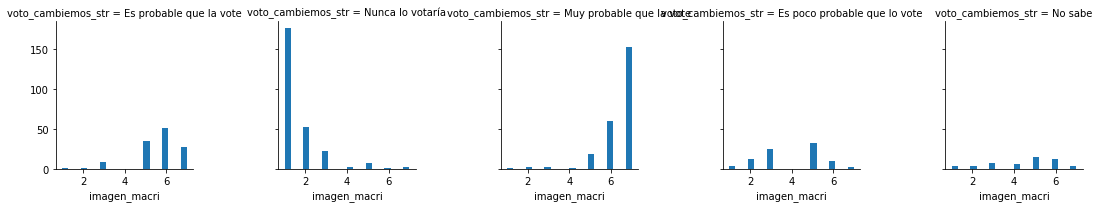

In [12]:
g = sns.FacetGrid(train_df, col='voto_cambiemos_str')
g.map(plt.hist, 'imagen_macri', bins=20)
plt.show()

In [11]:
train_df[['voto_cambiemos_str', 'imagen_vidal']].groupby(['voto_cambiemos_str'], as_index=False).mean().sort_values(by='imagen_vidal', ascending=False)

,voto_cambiemos_str,imagen_vidal
2,Muy probable que la vote,6.701087
1,Es probable que la vote,6.355140
3,No sabe,5.000000
0,Es poco probable que lo vote,4.771930
4,Nunca lo votaría,2.277487


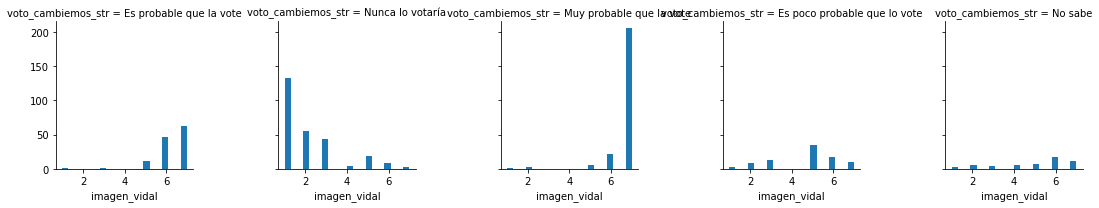

In [13]:
g = sns.FacetGrid(train_df, col='voto_cambiemos_str')
g.map(plt.hist, 'imagen_vidal', bins=20)
plt.show()

In [12]:
train_df[['voto_cambiemos_str', 'voto_cfk']].groupby(['voto_cambiemos_str'], as_index=False).mean().sort_values(by='voto_cfk', ascending=False)

,voto_cambiemos_str,voto_cfk
4,Nunca lo votaría,3.848168
0,Es poco probable que lo vote,2.175439
3,No sabe,1.907407
1,Es probable que la vote,1.392523
2,Muy probable que la vote,1.239130


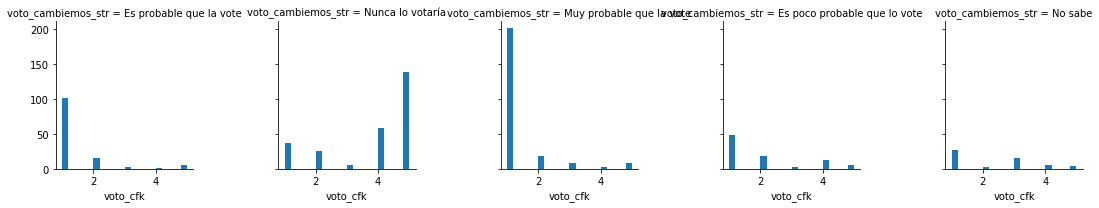

In [14]:
g = sns.FacetGrid(train_df, col='voto_cambiemos_str')
g.map(plt.hist, 'voto_cfk', bins=20)
plt.show()

In [13]:
train_df[['voto_cambiemos_str', 'economia_pais']].groupby(['voto_cambiemos_str'], as_index=False).mean().sort_values(by='economia_pais', ascending=False)

,voto_cambiemos_str,economia_pais
2,Muy probable que la vote,5.103261
1,Es probable que la vote,4.373832
3,No sabe,3.351852
0,Es poco probable que lo vote,2.719298
4,Nunca lo votaría,1.727749


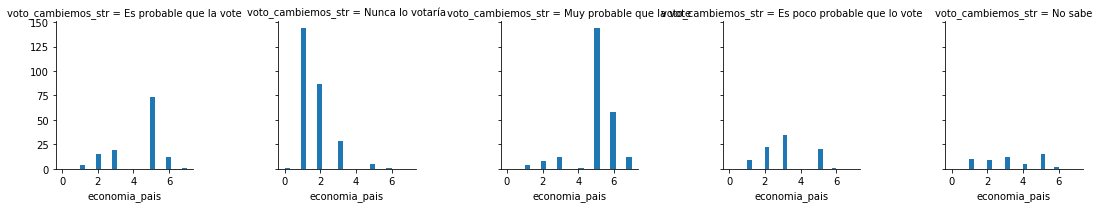

In [16]:
g = sns.FacetGrid(train_df, col='voto_cambiemos_str')
g.map(plt.hist, 'economia_pais', bins=20)
plt.show()

In [14]:
train_df[['voto_cambiemos_str', 'emocion_pais']].groupby(['voto_cambiemos_str'], as_index=False).mean().sort_values(by='emocion_pais', ascending=False)

,voto_cambiemos_str,emocion_pais
2,Muy probable que la vote,3.494565
1,Es probable que la vote,2.495327
3,No sabe,1.592593
4,Nunca lo votaría,1.094241
0,Es poco probable que lo vote,0.771930


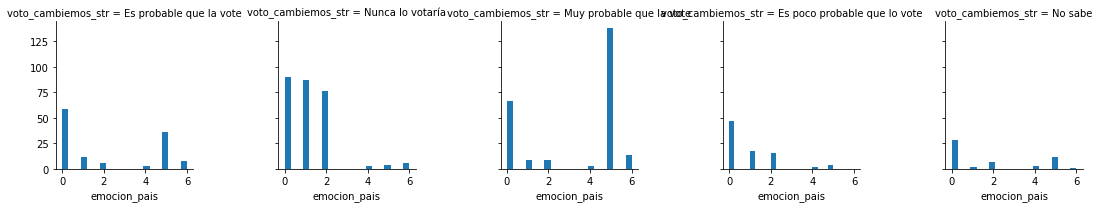

In [17]:
g = sns.FacetGrid(train_df, col='voto_cambiemos_str')
g.map(plt.hist, 'emocion_pais', bins=20)
plt.show()

In [20]:
train_df[['voto_cambiemos_str', 'inflacion_futuro']].groupby(['voto_cambiemos_str'], as_index=False).mean().sort_values(by='inflacion_futuro', ascending=False)

,voto_cambiemos_str,inflacion_futuro
4,Nunca lo votaría,3.582707
0,Es poco probable que lo vote,3.183908
3,No sabe,3.150943
1,Es probable que la vote,2.508065
2,Muy probable que la vote,1.928870


In [19]:
train_df[['voto_cambiemos_str', 'inflacion']].groupby(['voto_cambiemos_str'], as_index=False).mean().sort_values(by='inflacion', ascending=False)

,voto_cambiemos_str,inflacion
4,Nunca lo votaría,3.541353
0,Es poco probable que lo vote,3.471264
1,Es probable que la vote,3.354839
3,No sabe,3.188679
2,Muy probable que la vote,3.138075


In [15]:
train_df[['voto_cambiemos_str', 'Edad']].groupby(['voto_cambiemos_str'], as_index=False).mean().sort_values(by='Edad', ascending=False)

,voto_cambiemos_str,Edad
2,Muy probable que la vote,3.369565
3,No sabe,3.222222
1,Es probable que la vote,3.168224
0,Es poco probable que lo vote,3.000000
4,Nunca lo votaría,2.748691


In [16]:
train_df[['voto_cambiemos_str', 'Genero']].groupby(['voto_cambiemos_str'], as_index=False).mean().sort_values(by='Genero', ascending=False)

,voto_cambiemos_str,Genero
2,Muy probable que la vote,0.532609
0,Es poco probable que lo vote,0.526316
4,Nunca lo votaría,0.523560
3,No sabe,0.481481
1,Es probable que la vote,0.476636


In [17]:
train_df[['voto_cambiemos_str', 'principal_problematica_actualidad']].groupby(['voto_cambiemos_str'], as_index=False).mean().sort_values(by='principal_problematica_actualidad', ascending=False)

,voto_cambiemos_str,principal_problematica_actualidad
0,Es poco probable que lo vote,1.789474
2,Muy probable que la vote,1.592391
1,Es probable que la vote,1.485981
3,No sabe,1.407407
4,Nunca lo votaría,1.303665


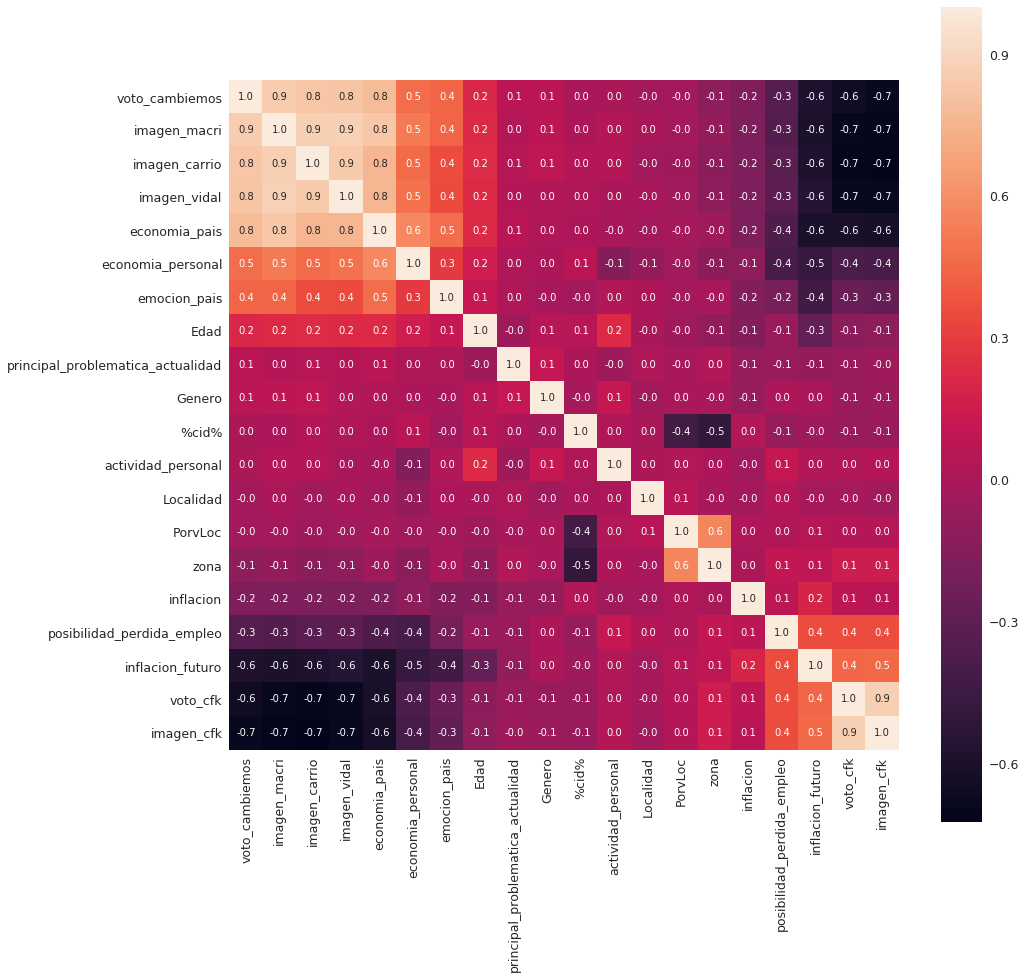

In [18]:
corrmat = train_df.corr()
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'voto_cambiemos')['voto_cambiemos'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(15,15))  
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.1f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

plt.show()

## Selección de features

Voy a dividir el data set en 3, uno con campos mas "obvios" o muy correlacionados, otro sin ellos y otro con menos campos aún, para hacerlo mas desafiante.<br>



In [25]:
df_filtered = train_df.filter(items=[
                                     'emocion_pais',
                                     'economia_pais',
                                     'economia_personal',
                                     'inflacion',
                                     'actividad_personal',
                                     'posibilidad_perdida_empleo',
                                     'Edad',
                                     'inflacion_futuro',
                                     'voto_cambiemos'])
df_more_filtered = train_df.filter(items=['principal_problematica_actualidad', 
                                     'emocion_pais',
                                     'economia_pais',
                                     'economia_personal',
                                     'inflacion',                                     
                                     'inflacion_futuro',
                                     'voto_cambiemos'])

df_obvio = train_df.filter(items=['imagen_macri',
                                  'economia_pais',
                                  'emocion_pais',
                                  'economia_personal',
                                  'voto_cambiemos',
                                     'imagen_cfk',
                                  'imagen_vidal',
                                  ])


## Entrenamientos

### Naive Bayes, RandomFores, Regresion Logistica, KNN, SVM

Selecciono las columnas mas correlacionadas

Clasifico con los algoritmos comunes

In [23]:
from sklearn.model_selection import train_test_split
def clasificadores(X,y):
    X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X, y)

    acc_knn = round(knn.score(X_test, y_test) * 100, 2)


    random_forest = RandomForestClassifier(n_estimators=100)
    random_forest.fit(X, y)

    acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)


    gaussian = GaussianNB()
    gaussian.fit(X, y)

    acc_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)


    logreg = LogisticRegression()
    logreg.fit(X, y)

    acc_log = round(logreg.score(X_test, y_test) * 100, 2)


    svc = SVC()
    svc.fit(X, y)

    acc_svc = round(svc.score(X_test, y_test) * 100, 2)


    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X, y)

    acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
    return [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_decision_tree]



In [26]:
X = df_obvio.drop("voto_cambiemos", axis=1)
y = df_obvio.filter(items=["voto_cambiemos"])
obvio = clasificadores(X,y)

X = df_filtered.drop("voto_cambiemos", axis=1)
y = df_filtered.filter(items=["voto_cambiemos"])
filtered = clasificadores(X,y)

X = df_more_filtered.drop("voto_cambiemos", axis=1)
y = df_more_filtered.filter(items=["voto_cambiemos"])
more_filtered = clasificadores(X,y)


models = pd.DataFrame({
    'Clasificador': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Obvio': obvio,
    'Filtrado': filtered,
    'Mas Filtrado': more_filtered})
models[['Clasificador','Obvio','Filtrado','Mas Filtrado']].sort_values(by='Obvio', ascending=False)

/home/monteagudo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/home/monteagudo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/home/monteagudo/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monteagudo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

,Clasificador,Obvio,Filtrado,Mas Filtrado
3,Random Forest,66.23,57.79,61.04
5,Decision Tree,65.58,50.00,55.84
0,Support Vector Machines,64.94,58.44,61.69
4,Naive Bayes,62.99,59.09,58.44
1,KNN,61.69,51.95,61.04
2,Logistic Regression,60.39,60.39,61.04


### REDES NEURONALES

In [27]:
%load_ext autoreload
%autoreload 2
from IPython.display import HTML
import reg_helper as RHelper
import numpy as np
import draw_nn
from matplotlib import pyplot as plt 
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras import initializers
from fnn_helper import PlotLosses
from keras import optimizers

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [40]:
X = df_obvio.drop("voto_cambiemos", axis=1)
y = df_obvio.filter(items=["voto_cambiemos"])
from sklearn.model_selection import train_test_split
#train_df.voto_cambiemos_reducido.unique()
X.shape

(769, 6)

In [41]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
X_train, X_test, y_train, y_test= train_test_split(X, dummy_y, test_size=0.2, random_state=42)

/home/monteagudo/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monteagudo/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:

epochs = 2000 #adam 3000, sgd 30000
lr=0.001
decay=0
input_shape = 6
hidden_units = 25 # Probar con 3, 10, 20, 200
output_size = 5
#optim = optimizers.sgd(lr=lr, decay=decay, momentum=0) # cambiar a momentum 0.9 y lr a 5
batch_size = 1024# 10 y 59
p = 0.4


default_initializer = 'normal'
# Creo el modelo
model_single_layer = Sequential()

model_single_layer.add(Dense(hidden_units, input_dim=input_shape, init='RandomUniform',activation="relu"))
model_single_layer.add(Dropout(p))
model_single_layer.add(BatchNormalization())
model_single_layer.add(Dense(hidden_units, kernel_initializer=default_initializer,bias_initializer=default_initializer, name='Hidden',activation="relu"))
model_single_layer.add(Dropout(p))
model_single_layer.add(BatchNormalization())

model_single_layer.add(Dense(output_size, kernel_initializer=default_initializer, name='Salida'))
model_single_layer.add(Activation('softmax'))
model_single_layer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 25)                175       
_________________________________________________________________
dropout_24 (Dropout)         (None, 25)                0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 25)                100       
_________________________________________________________________
Hidden (Dense)               (None, 25)                650       
_________________________________________________________________
dropout_25 (Dropout)         (None, 25)                0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 25)                100       
_________________________________________________________________
Salida (Dense)               (None, 5)                 130       
__________

/home/monteagudo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, kernel_initializer="RandomUniform", input_dim=6, activation="relu")`


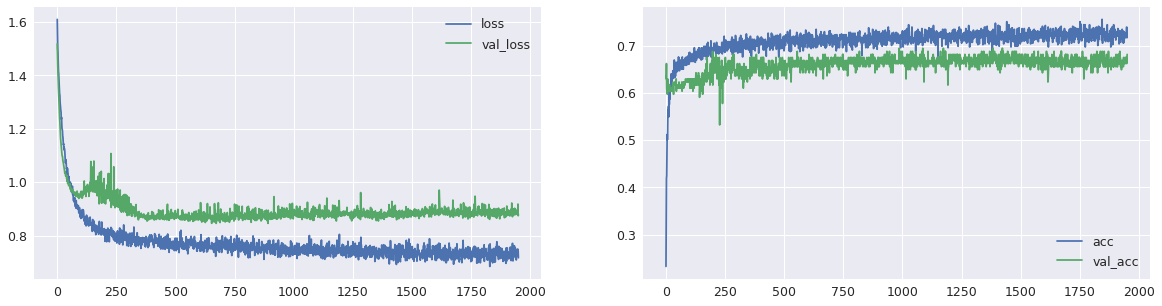

In [74]:

#optim = optimizers.adam(lr=lr, decay=0.01)
optim = optimizers.rmsprop(lr=lr, decay=0.001)
model_single_layer.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
plot_losses = PlotLosses(plot_interval=50, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
checkpointer = ModelCheckpoint(filepath='model_enero_marzo.hdf5', verbose=0, save_best_only=True)
model_single_layer.fit(X_train, 
          y_train, batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses, checkpointer],
         )

In [75]:
model_single_layer.load_weights('model_enero_marzo.hdf5')
loss, acc = model_single_layer.evaluate(X_test, y_test)

154/154 [==============================] - 0s 40us/step


In [76]:
print(acc)

0.6818181802700092


In [79]:
test_filtered = test_df.filter(items=['imagen_macri',
                                  'economia_pais',
                                  'emocion_pais',
                                  'economia_personal',
                                  'voto_cambiemos_str',
                                     'imagen_cfk',
                                  'imagen_vidal'])
voto_cambiemos_mapping = {'Nunca lo votaría':1, 'Es poco probable que lo vote':2, 'No sabe':3,
                         'Es probable que la vote':4,'Muy probable que la vote':5}

test_filtered['voto_cambiemos'] = test_filtered['voto_cambiemos_str'].map(voto_cambiemos_mapping)

#elimino los missing
test_filtered['voto_cambiemos'] = test_filtered['voto_cambiemos'].fillna(6).astype(int)
test_filtered = test_filtered.drop(test_filtered.loc[test_filtered['voto_cambiemos'] == 6].index)


test_filtered = test_filtered.drop("voto_cambiemos_str", axis=1).copy()
test_filtered_sub  =test_filtered.sample(n=20)
test_filtered_sub  =test_filtered
X_test_2  = test_filtered_sub.drop("voto_cambiemos", axis=1).copy()
y_test_2 = test_filtered_sub.filter(items=["voto_cambiemos"])


test_prediction = model_single_layer.predict(X_test_2)
test_labels = np.argmax(test_prediction, axis = -1)

In [82]:
test_labels = test_labels+1
np.unique(test_labels)

array([1, 2, 4, 5])

In [83]:
from sklearn.metrics import roc_auc_score,roc_curve, auc,accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from scipy import interp
from itertools import cycle



print('recall: ',recall_score(y_test_2['voto_cambiemos'], test_labels, average="macro"))
print('precision_score: ',precision_score(y_test_2['voto_cambiemos'], test_labels, average="macro"))
print('F1: ',f1_score(y_test_2['voto_cambiemos'], test_labels, average="macro"))

recall:  0.4897919988674614
precision_score:  0.4490123797507116
F1:  0.45422241100849214


/home/monteagudo/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/monteagudo/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Utilizando los campos del dataframe "obvio" y el "filtrado", probé la performance humana. Tome 20 casos al azar y le pedí a gente politizada que me digan en cada caso si vota, no vota o no sabe a cambiemos.<br>
<br>
El accuracy humano (medido mediante F1) en el caso obvio es de: <b> 0.51 </b><br>
El accuracy humano (medido mediante F1) en el caso menos obvio es de: <b> 0.44 </b>

## Reduzco la cantidad de clases a predecir para simplificar

In [84]:
voto_cambiemos_mapping = {'Nunca lo votaría':1, 'Es poco probable que lo vote':1, 'No sabe':2,
                         'Es probable que la vote':3,'Muy probable que la vote':3}

train_df['voto_cambiemos_reducido'] = train_df['voto_cambiemos_str'].map(voto_cambiemos_mapping)
train_df['voto_cambiemos_reducido'] = train_df['voto_cambiemos_reducido'].fillna(0).astype(int)
train_df = train_df.drop(train_df.loc[train_df['voto_cambiemos_reducido'] == 0].index)

df_filtered['voto_cambiemos_reducido'] = train_df['voto_cambiemos_reducido']
df_more_filtered['voto_cambiemos_reducido'] = train_df['voto_cambiemos_reducido']
df_obvio['voto_cambiemos_reducido'] = train_df['voto_cambiemos_reducido']




df_filtered = df_filtered.drop(['voto_cambiemos'], axis=1)
df_more_filtered = df_more_filtered.drop(['voto_cambiemos'], axis=1)
df_obvio = df_obvio.drop(['voto_cambiemos'], axis=1)



In [85]:
X = df_obvio.drop("voto_cambiemos_reducido", axis=1)
y = df_obvio.filter(items=["voto_cambiemos_reducido"])
obvio = clasificadores(X,y)

X = df_filtered.drop("voto_cambiemos_reducido", axis=1)
y = df_filtered.filter(items=["voto_cambiemos_reducido"])
filtered = clasificadores(X,y)

X = df_more_filtered.drop("voto_cambiemos_reducido", axis=1)
y = df_more_filtered.filter(items=["voto_cambiemos_reducido"])
more_filtered = clasificadores(X,y)



models = pd.DataFrame({
    'Clasificador': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Obvio': obvio,
    'Filtrado': filtered,
    'Mas Filtrado': more_filtered})
models[['Clasificador','Obvio','Filtrado','Mas Filtrado']].sort_values(by='Obvio', ascending=False)

/home/monteagudo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/home/monteagudo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/home/monteagudo/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monteagudo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

,Clasificador,Obvio,Filtrado,Mas Filtrado
3,Random Forest,85.71,78.57,77.92
2,Logistic Regression,85.06,76.62,77.92
0,Support Vector Machines,84.42,77.27,78.57
1,KNN,83.77,77.27,77.92
4,Naive Bayes,81.82,77.27,76.62
5,Decision Tree,80.52,73.38,75.97


### Red neuronal 3 clases vota, no vota, no sabe

In [88]:
X = df_obvio.drop("voto_cambiemos_reducido", axis=1)
y = df_obvio.filter(items=["voto_cambiemos_reducido"])
from sklearn.model_selection import train_test_split
#train_df.voto_cambiemos_reducido.unique()
np.unique(y)

array([1, 2, 3])

In [89]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
X_train, X_test, y_train, y_test= train_test_split(X, dummy_y, test_size=0.2, random_state=42)
X_train.shape

/home/monteagudo/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monteagudo/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(615, 6)

In [147]:
epochs = 1000 #adam 3000, sgd 30000
lr=0.005
decay=0
input_shape = 6
hidden_units = 60 # Probar con 3, 10, 20, 200
output_size = 3
p = 0.3
batch_size = 1024 # 10 y 59

optim = optimizers.adam(lr=lr, decay=0.1)
#optim = optimizers.rmsprop(lr=lr, decay=0.001)

default_initializer = 'normal'
# Creo el modelo
model_3_clases = Sequential()
model_3_clases.add(Dense(hidden_units, input_dim=input_shape, init=default_initializer,activation="sigmoid"))
model_3_clases.add(Dropout(p))
model_3_clases.add(BatchNormalization())
model_3_clases.add(Dense(hidden_units, kernel_initializer=default_initializer,bias_initializer=default_initializer, name='Hidden',activation="sigmoid"))

model_3_clases.add(Dense(output_size, kernel_initializer=default_initializer, name='Salida'))
model_3_clases.add(Activation('softmax'))
model_3_clases.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
model_3_clases.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 60)                420       
_________________________________________________________________
dropout_58 (Dropout)         (None, 60)                0         
_________________________________________________________________
batch_normalization_62 (Batc (None, 60)                240       
_________________________________________________________________
Hidden (Dense)               (None, 60)                3660      
_________________________________________________________________
Salida (Dense)               (None, 3)                 183       
_________________________________________________________________
activation_31 (Activation)   (None, 3)                 0         
Total params: 4,503
Trainable params: 4,383
Non-trainable params: 120
_________________________________________________________________


/home/monteagudo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(60, kernel_initializer="normal", input_dim=6, activation="sigmoid")`
  app.launch_new_instance()


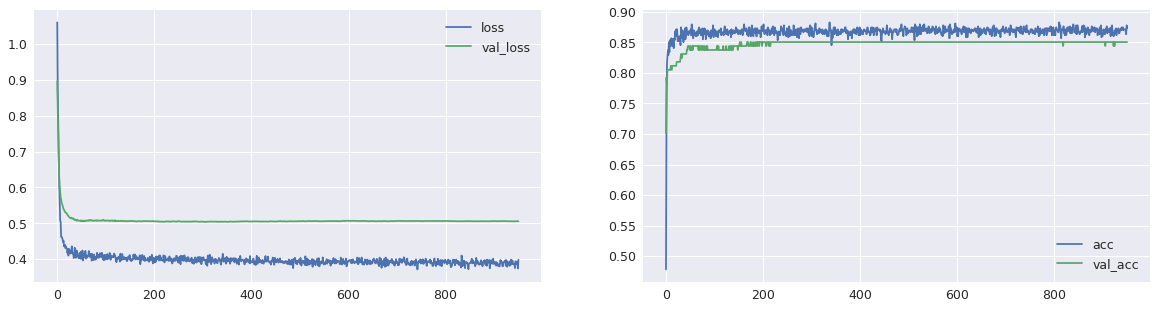

In [148]:
#sgd = SGD(lr=lr, decay=decay, momentum=0.9, nesterov=True)
#optim = optimizers.adam(lr=lr, decay=0.1)
optim = optimizers.rmsprop(lr=lr, decay=0.05)
model_3_clases.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
plot_losses = PlotLosses(plot_interval=50, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
checkpointer = ModelCheckpoint(filepath='model_3_clases.hdf5', verbose=0, save_best_only=True)
model_3_clases.fit(X_train, 
          y_train, batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses, checkpointer],
         )

In [149]:
model_3_clases.load_weights('model_3_clases.hdf5')
loss, acc = model_3_clases.evaluate(X_test, y_test)

154/154 [==============================] - 0s 49us/step


In [150]:
print(acc)

0.8506493475530055


In [157]:
test_filtered = test_df.filter(items=['imagen_macri',
                                  'economia_pais',
                                  'emocion_pais',
                                  'economia_personal',
                                  'voto_cambiemos_str',
                                     'imagen_cfk',
                                  'imagen_vidal'])
voto_cambiemos_mapping = {'Nunca lo votaría':0, 'Es poco probable que lo vote':0, 'No sabe':1,
                         'Es probable que la vote':2,'Muy probable que la vote':2}

test_filtered['voto_cambiemos_reducido'] = test_filtered['voto_cambiemos_str'].map(voto_cambiemos_mapping)
test_filtered['voto_cambiemos_reducido'] = test_filtered['voto_cambiemos_reducido'].fillna(3).astype(int)
test_filtered = test_filtered.drop(test_filtered.loc[test_filtered['voto_cambiemos_reducido'] == 3].index)


test_filtered = test_filtered.drop("voto_cambiemos_str", axis=1).copy()
test_filtered_sub  =test_filtered.sample(n=20)
test_filtered_sub  =test_filtered
X_test_2  = test_filtered_sub.drop("voto_cambiemos_reducido", axis=1).copy()
y_test_2 = test_filtered_sub.filter(items=["voto_cambiemos_reducido"])


test_prediction = model_3_clases.predict(X_test_2)
test_labels = np.argmax(test_prediction, axis = -1)
#test_labels = test_prediction.argmax(axis=-1)

In [153]:
np.unique(y_test_2, return_counts=True)

(array([0, 1, 2]), array([248,  54, 291]))

In [158]:

np.unique(test_labels)


array([0, 2])

In [159]:
from sklearn.metrics import roc_auc_score,roc_curve, auc,accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from scipy import interp
from itertools import cycle



print('recall: ',recall_score(y_test_2['voto_cambiemos_reducido'], test_labels, average="macro"))
print('precision_score: ',precision_score(y_test_2['voto_cambiemos_reducido'], test_labels, average="macro"))
print('F1: ',f1_score(y_test_2['voto_cambiemos_reducido'], test_labels, average="macro"))

recall:  0.6132404020249048
precision_score:  0.5572424471241486
F1:  0.5838996712936791


/home/monteagudo/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/monteagudo/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Predicción con dos clases vota, no vota

In [160]:
df_dos_clases = df_filtered.drop(df_filtered.loc[train_df['voto_cambiemos_reducido'] == 2].index)
df_dos_clases_obvio = df_obvio.drop(df_filtered.loc[train_df['voto_cambiemos_reducido'] == 2].index)

In [161]:
X = df_dos_clases.drop("voto_cambiemos_reducido", axis=1)
y = df_dos_clases.filter(items=["voto_cambiemos_reducido"])
dos_clases_filtrado = clasificadores(X,y)

X = df_dos_clases_obvio.drop("voto_cambiemos_reducido", axis=1)
y = df_dos_clases_obvio.filter(items=["voto_cambiemos_reducido"])
dos_clases_obvio = clasificadores(X,y)

models = pd.DataFrame({
    'Clasificador': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Dos clases filtrado': dos_clases_filtrado,
    'Dos clases obvio': dos_clases_obvio})
models[['Clasificador','Dos clases obvio','Dos clases filtrado']].sort_values(by='Dos clases obvio', ascending=False)

/home/monteagudo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/home/monteagudo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/home/monteagudo/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monteagudo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

,Clasificador,Dos clases obvio,Dos clases filtrado
3,Random Forest,92.36,82.64
0,Support Vector Machines,90.97,84.72
2,Logistic Regression,90.97,81.94
4,Naive Bayes,89.58,83.33
5,Decision Tree,88.89,75.69
1,KNN,87.50,79.86


### Red neuronal

In [164]:
X = df_dos_clases_obvio.drop("voto_cambiemos_reducido", axis=1)
y = df_dos_clases_obvio.filter(items=["voto_cambiemos_reducido"])
from sklearn.model_selection import train_test_split
#train_df.voto_cambiemos_reducido.unique()
X.shape

(716, 6)

In [165]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
X_train, X_test, y_train, y_test= train_test_split(X, dummy_y, test_size=0.2, random_state=42)
X_train.shape

/home/monteagudo/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/monteagudo/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(572, 6)

In [166]:
epochs = 500 #adam 3000, sgd 30000
lr=0.02
decay=0
input_shape = 6
hidden_units = 30 # Probar con 3, 10, 20, 200
output_size = 2
p = 0.2
batch_size = 1024 # 10 y 59

optim = optimizers.adam(lr=lr, decay=0.1)
#optim = optimizers.rmsprop(lr=lr, decay=0.001)

default_initializer = 'normal'
# Creo el modelo
model_single_layer = Sequential()
model_single_layer.add(Dense(hidden_units, input_dim=input_shape, init='RandomUniform',activation="relu"))
model_single_layer.add(BatchNormalization())
model_single_layer.add(Dropout(p))
model_single_layer.add(Dense(hidden_units, kernel_initializer=default_initializer,bias_initializer=default_initializer, name='Hidden',activation="relu"))
model_single_layer.add(BatchNormalization())
model_single_layer.add(Dropout(p))



model_single_layer.add(Dense(output_size, kernel_initializer=default_initializer, name='Salida'))
model_single_layer.add(Activation('softmax'))
model_single_layer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 30)                210       
_________________________________________________________________
batch_normalization_63 (Batc (None, 30)                120       
_________________________________________________________________
dropout_59 (Dropout)         (None, 30)                0         
_________________________________________________________________
Hidden (Dense)               (None, 30)                930       
_________________________________________________________________
batch_normalization_64 (Batc (None, 30)                120       
_________________________________________________________________
dropout_60 (Dropout)         (None, 30)                0         
_________________________________________________________________
Salida (Dense)               (None, 2)                 62        
__________

/home/monteagudo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, kernel_initializer="RandomUniform", input_dim=6, activation="relu")`
  app.launch_new_instance()


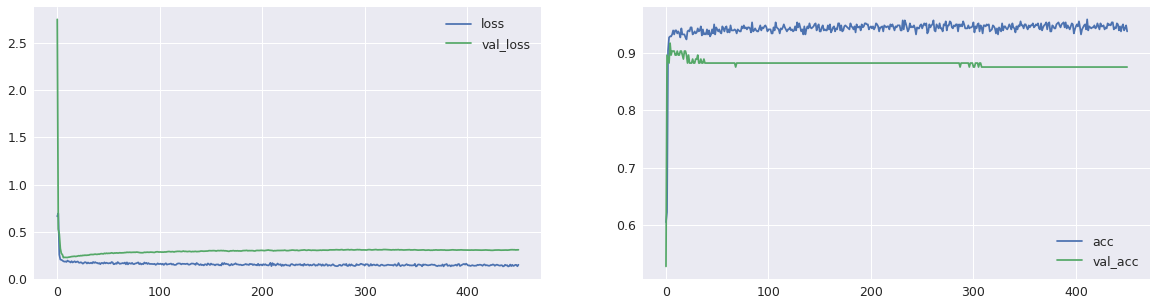

In [167]:
#sgd = SGD(lr=lr, decay=decay, momentum=0.9, nesterov=True)
#optim = optimizers.adam(lr=lr, decay=0.1)
optim = optimizers.rmsprop(lr=lr, decay=0.3)
model_single_layer.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
plot_losses = PlotLosses(plot_interval=50, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
checkpointer = ModelCheckpoint(filepath='model_dos_clases.hdf5', verbose=0, save_best_only=True)
model_single_layer.fit(X_train, 
          y_train, batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses, checkpointer],
         )

In [168]:
model_single_layer.load_weights('model_dos_clases.hdf5')
loss, acc = model_single_layer.evaluate(X_test, y_test)

144/144 [==============================] - 0s 55us/step


In [169]:
print(acc)

0.9027777777777778


In [170]:
test_filtered = test_df.filter(items=['imagen_macri',
                                  'economia_pais',
                                  'emocion_pais',
                                  'economia_personal',
                                  'voto_cambiemos_str',
                                     'imagen_cfk',
                                  'imagen_vidal'])
voto_cambiemos_mapping = {'Nunca lo votaría':0, 'Es poco probable que lo vote':0, 'No sabe':2,
                         'Es probable que la vote':1,'Muy probable que la vote':1}

test_filtered['voto_cambiemos_reducido'] = test_filtered['voto_cambiemos_str'].map(voto_cambiemos_mapping)
test_filtered = test_filtered.drop("voto_cambiemos_str", axis=1).copy()


test_filtered = test_filtered.drop(test_filtered.loc[test_filtered['voto_cambiemos_reducido'] == 2].index)
test_filtered['voto_cambiemos_reducido'] = test_filtered['voto_cambiemos_reducido'].fillna(3).astype(int)
test_filtered = test_filtered.drop(test_filtered.loc[test_filtered['voto_cambiemos_reducido'] == 3].index)

test_filtered_sub  =test_filtered.sample(n=80)

X_test_2  = test_filtered_sub.drop("voto_cambiemos_reducido", axis=1).copy()
y_test_2 = test_filtered_sub.filter(items=["voto_cambiemos_reducido"])
test_prediction = model_single_layer.predict(X_test_2)
test_labels = np.argmax(test_prediction, axis = 1)

In [171]:
from sklearn.metrics import roc_auc_score,roc_curve, auc,accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from scipy import interp
from itertools import cycle



print('recall: ',recall_score(y_test_2['voto_cambiemos_reducido'], test_labels, average="macro"))
print('precision_score: ',precision_score(y_test_2['voto_cambiemos_reducido'], test_labels, average="macro"))
print('F1: ',f1_score(y_test_2['voto_cambiemos_reducido'], test_labels, average="macro"))

recall:  0.924812030075188
precision_score:  0.924812030075188
F1:  0.924812030075188


## ¿Porqué cambia tanto la performance en el test cuando son sólo dos clases?
Grafiquemos en dos dimensiones a cada persona y coloremosla en base a si votaría o no a cambiemos. Los que sí lo votarían (con alguna probabilidad) los coloreamos amarillos, los que no azules y los que aún no saben en rojo.

#### Entrenamiento (Marzo)

In [172]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
fmd = df_obvio
svd = TruncatedSVD(n_components=8, n_iter=200, random_state=42)
svd.fit(fmd.T)
X_embedded = TSNE(n_components=2).fit_transform(svd.components_.T)

In [178]:
df_obvio = train_df.filter(items=['imagen_macri',
                                  'economia_pais',
                                  'emocion_pais',
                                  'economia_personal',
                                  'voto_cambiemos_str',
                                     'imagen_cfk',
                                  'imagen_vidal'])
voto_cambiemos_mapping = {'Nunca lo votaría':1, 'Es poco probable que lo vote':2, 'No sabe':3,
                         'Es probable que la vote':4,'Muy probable que la vote':5}

df_obvio['voto_cambiemos_reducido'] = df_obvio['voto_cambiemos_str'].map(voto_cambiemos_mapping)
voto = df_obvio['voto_cambiemos_reducido']

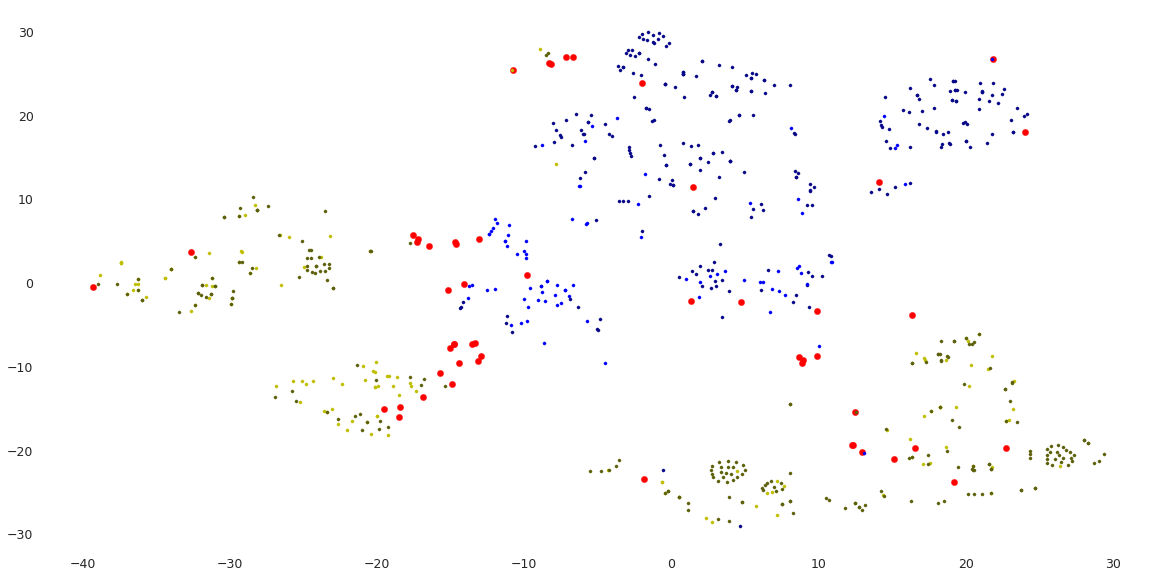

In [191]:
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(20,10),facecolor='white')
ax = fig1.add_subplot(1, 1, 1) 
ax.set_facecolor('white')
plt.scatter(X_embedded[voto[:]==1,0], X_embedded[voto[:]==1,1], color='#08088A', s=10)
plt.scatter(X_embedded[voto[:]==3,0], X_embedded[voto[:]==3,1], color='r', s=40)
plt.scatter(X_embedded[voto[:]==2,0], X_embedded[voto[:]==2,1], color='b', s=10)
plt.scatter(X_embedded[voto[:]==4,0], X_embedded[voto[:]==4,1], color='y', s=10)
plt.scatter(X_embedded[voto[:]==5,0], X_embedded[voto[:]==5,1], color='#5E610B', s=10)

plt.show()

#### Test (Enero)

In [13]:
fmd = test_filtered
svd = TruncatedSVD(n_components=8, n_iter=200, random_state=42)
svd.fit(fmd.T)
X_embedded = TSNE(n_components=2).fit_transform(svd.components_.T)

In [14]:
voto = test_filtered['voto_cambiemos_reducido']

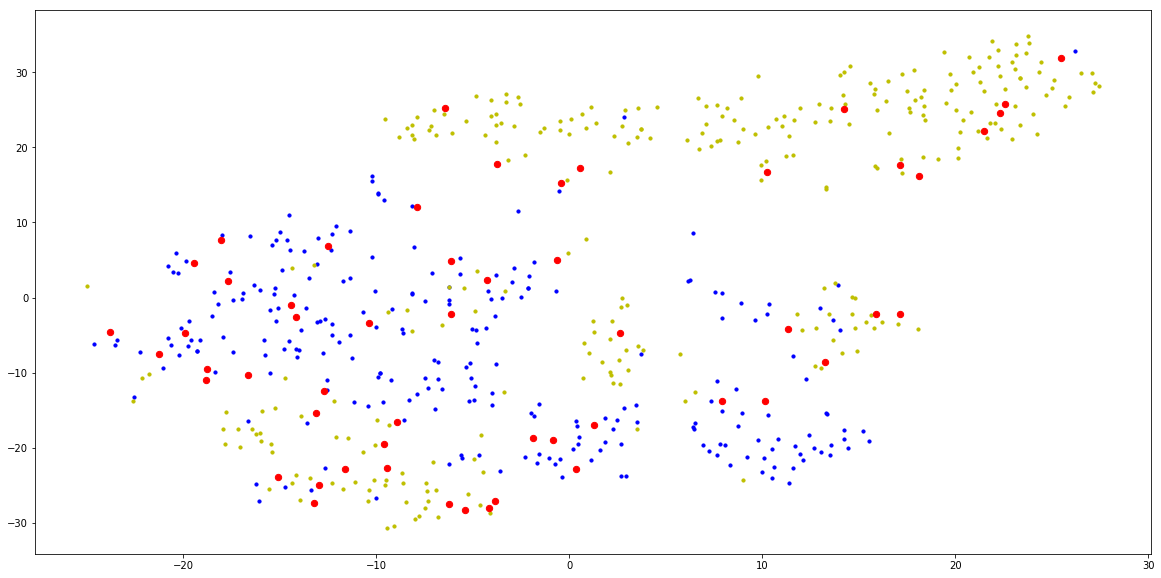

In [15]:
plt.figure(figsize=(20,10))
plt.scatter(X_embedded[voto[:]==0,0], X_embedded[voto[:]==0,1], color='b', s=10)
plt.scatter(X_embedded[voto[:]==2,0], X_embedded[voto[:]==2,1], color='y', s=10)
plt.scatter(X_embedded[voto[:]==1,0], X_embedded[voto[:]==1,1], color='r', s=40)
plt.show()

Al realizar la reducción de dimensionalidad podemos observar como los grupos que si lo votarían ocupan regiones bien definidas y diferenciadas de quienes no. A su vez podemos ver que quienes aún no deciden su voto no ocupan una región distinta a las otras dos sino que se mezclan en ellas, por lo que podemos inducir que quienes no definieron su voto no tienen una visión distinta de quienes si. 
Por lo que sería de esperar que aquellos puntos rojos terminen votando como los puntos del color que los rodean y por lo tanto es de esperar que los modelosde machine learning tengan una mayor precisión.